In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding = "latin1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2785,ham,Yeah get the unlimited,NaN,NaN,NaN
1670,ham,Lmao!nice 1,NaN,NaN,NaN
592,spam,PRIVATE! Your 2003 Account Statement for 07753...,NaN,NaN,NaN
1788,ham,Arun can u transfr me d amt,NaN,NaN,NaN
3113,ham,Yes watching footie but worried we're going to...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Droping last three columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = "columns",inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Renaming the columns
df.rename(columns = {"v1":"Status", "v2":"Messages"}, inplace = True)
df.head()

,Status,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Labeling ham with 0 and spam with 1
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(df["Status"])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
df["Status"] = encoder.fit_transform(df["Status"])
df.head()

,Status,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Checking missing values
df.isnull().sum()

Status      0
Messages    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

# EDA

In [14]:
# Number of Ham and Spam messages
df["Status"].value_counts()

Status
0    4516
1     653
Name: count, dtype: int64

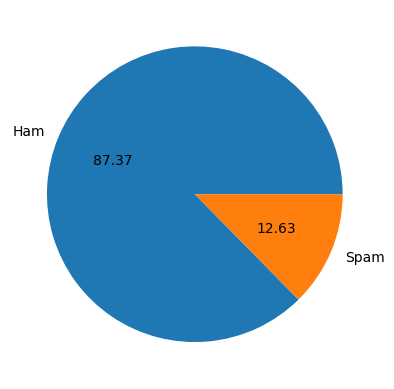

In [15]:
import matplotlib.pyplot as plt

plt.pie(df["Status"].value_counts(), labels = ["Ham", "Spam"], autopct = "%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
# number of characters
df["no_of_chars"]=df["Messages"].apply(len)
df

,Status,Messages,no_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
# no of words

df["no_of_words"]=df["Messages"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Status,Messages,no_of_chars,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# no of sentences
df["no_of_sentences"]=df["Messages"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Status,Messages,no_of_chars,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
# statistical summary of messages
df[["no_of_chars","no_of_words", "no_of_sentences"]].describe()

,no_of_chars,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# statistical summary of ham messages
df[df["Status"] == 0][["no_of_chars","no_of_words", "no_of_sentences"]].describe()

,no_of_chars,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# statistical summary of spam messages
df[df["Status"] == 1][["no_of_chars","no_of_words", "no_of_sentences"]].describe()

,no_of_chars,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<Axes: xlabel='no_of_chars', ylabel='Count'>

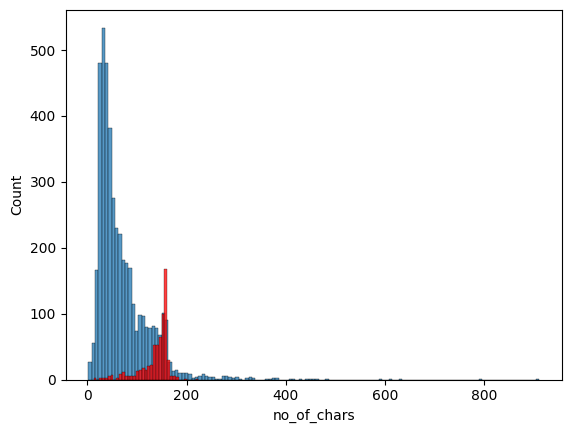

In [26]:
sns.histplot(df[df["Status"] == 0]["no_of_chars"])
sns.histplot(df[df["Status"] == 1]["no_of_chars"], color = "r")

C:\Users\sakhii computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


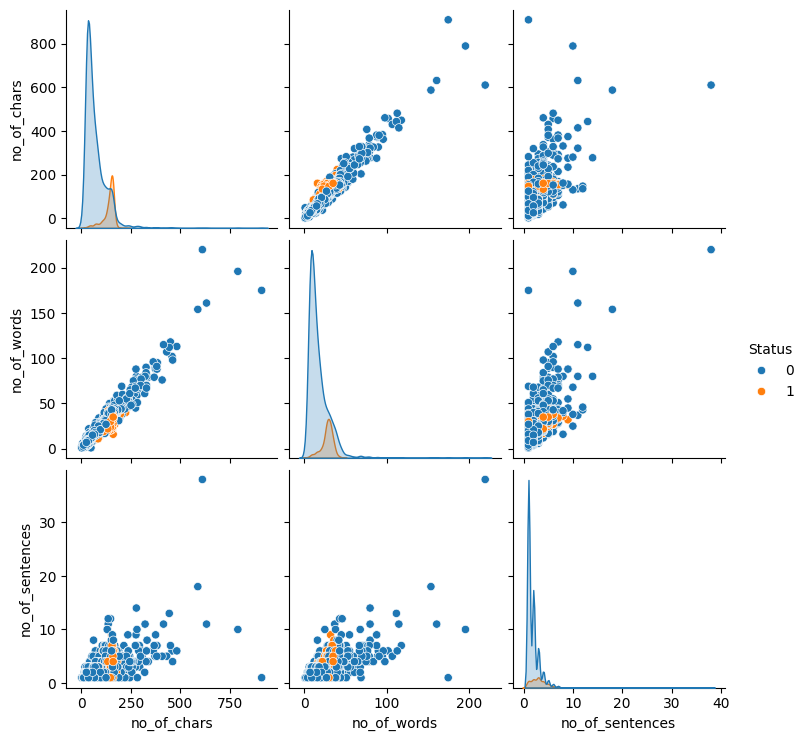

In [27]:
sns.pairplot(df, hue = "Status")

<Axes: >

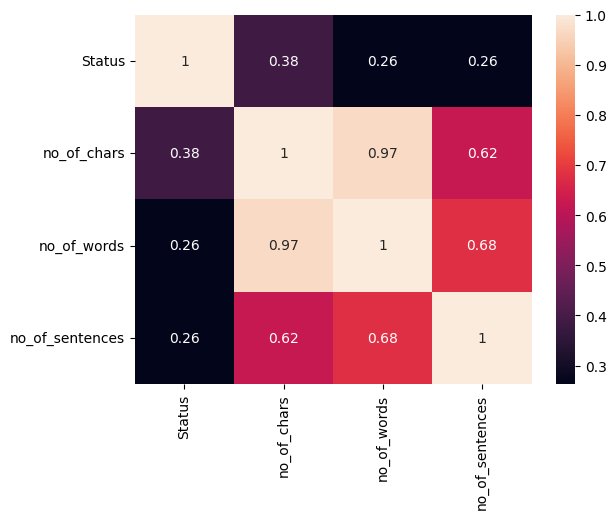

In [28]:
numeric_columns = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot = True)

# Data Preprocessing

    -> Lower case
    -> Tokenization
    -> Removing special characters
    -> Removing stop words and puctuations
    -> Stemming

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_message(message):
    # Convert the message to lowercase
    message = message.lower()
    
    # Tokenize the message
    words = nltk.word_tokenize(message)
    
    # Initialize an empty list to store valid words
    filtered_words = []
    
    # Remove non-alphanumeric characters and stopwords
    for word in words:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            # Apply stemming to the word
            stemmed_word = ps.stem(word)
            filtered_words.append(stemmed_word)
    
    # Join the filtered words into a single string
    return " ".join(filtered_words)


In [30]:
df["tansformed_messages"] = df["Messages"].apply(transform_message)
df.head()

,Status,Messages,no_of_chars,no_of_words,no_of_sentences,tansformed_messages
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
w_cloud = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [32]:
spam_w_cloud = w_cloud.generate(df[df["Status"] == 1]["tansformed_messages"].str.cat(sep = " "))

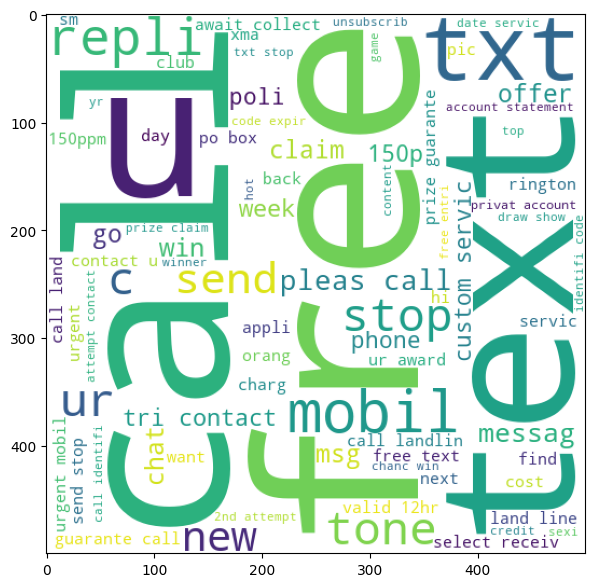

In [33]:
plt.figure(figsize = (7, 7))
plt.imshow(spam_w_cloud)

In [34]:
ham_w_cloud = w_cloud.generate(df[df["Status"] == 0]["tansformed_messages"].str.cat(sep = " "))

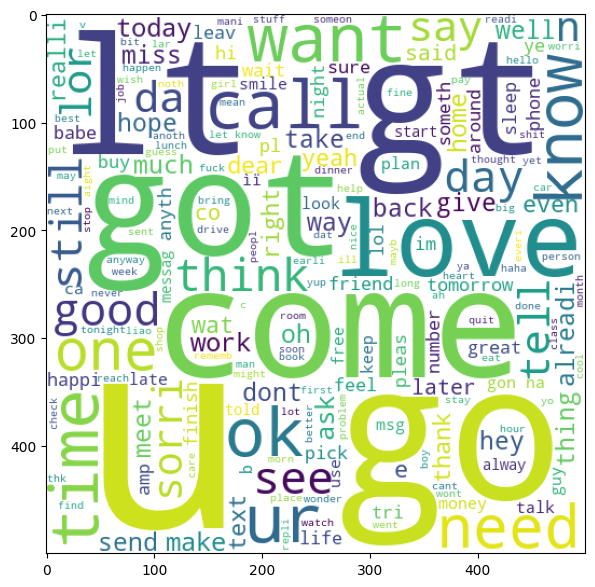

In [35]:
plt.figure(figsize = (7, 7))
plt.imshow(ham_w_cloud)

# Model Building

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
X = tfidf.fit_transform(df['tansformed_messages']).toarray()

In [38]:
y = df["Status"].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [44]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [45]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [46]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))